# Task2: Predict Future Stock Prices (Short-Term)

### Step 1: Install Required Libraries

pip install yfinance pandas scikit-learn matplotlib

In [10]:
!pip install yfinance

  Using cached yfinance-0.2.61-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
  Using cached peewee-3.18.1.tar.gz (3.0 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached curl_cffi-0.11.2-cp39-abi3-win_amd64.whl.metadata (15 kB)
Using cached yfinance-0.2.61-py2.py3-none-any.whl (117 kB)
Using cached curl_cffi-0.11.2-cp39-abi3-win_amd64.whl (1.4 MB)
Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Created wheel for peewee: filename=peewee-3.18.1-py3-none-any.whl size=139097 sha256=91c2e94f0bd21e5de2ec4c3a986dcb51ead572dac1036929b92ae76c3f4bd2bd
  Stored in directory: c:\users\pmls\appdata\local\pip\cache\wheels\1a\57\6a\bb

### Step 2: Import Libraries

In [14]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

### Step 3: Download Historical Stock Data

In [17]:
# Choose your stock symbol, e.g., 'AAPL' for Apple
stock_symbol = 'AAPL'
data = yf.download(stock_symbol, start='2020-01-01', end='2024-12-31')

# Preview the data
print(data.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.620842  72.681289  71.373218  71.627092  135480400
2020-01-03  71.914818  72.676447  71.689957  71.847118  146322800
2020-01-06  72.487839  72.526526  70.783241  71.034702  118387200
2020-01-07  72.146935  72.753816  71.926907  72.497522  108872000
2020-01-08  73.307495  73.609729  71.849518  71.849518  132079200


### Step 4: Prepare the Dataset

In [20]:
# Create a new column for the next day's Close price
data['Target'] = data['Close'].shift(-1)

# Drop the last row (it will have NaN in Target)
data = data[:-1]

# Features and target
features = ['Open', 'High', 'Low', 'Volume']
X = data[features]
y = data['Target']

### Step 5: Train/Test Split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

### Step 6: Train a Model

In [26]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

### Step 7: Evaluate the Model

In [29]:
print("Random Forest MSE:", mean_squared_error(y_test, rf_preds))

Random Forest MSE: 664.1184249472684


### Step 8: Plot Actual vs Predicted Closing Prices

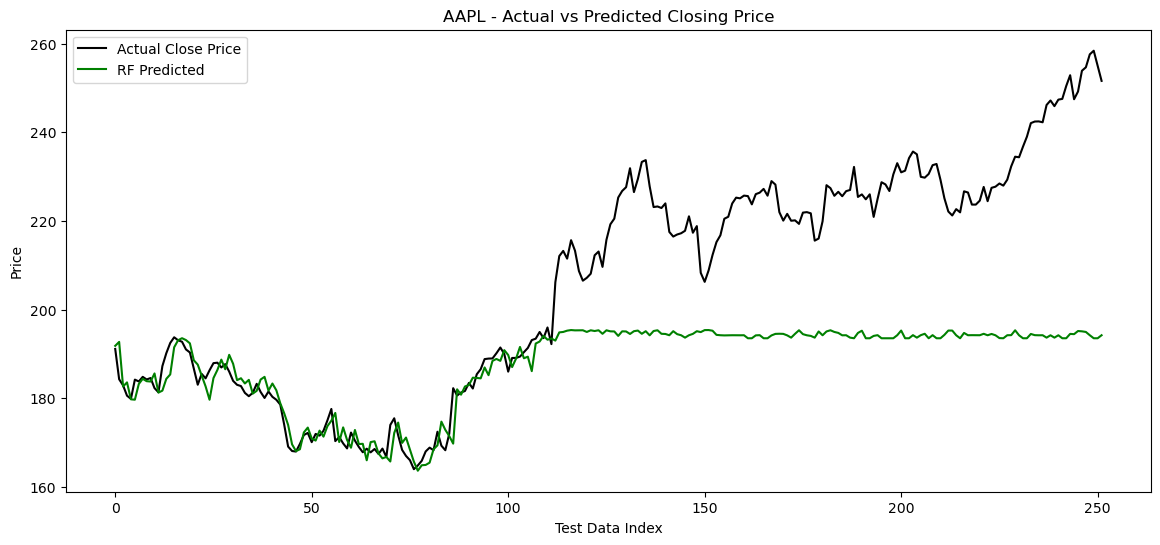

In [34]:
plt.figure(figsize=(14, 6))
plt.plot(y_test.values, label='Actual Close Price', color='black')
plt.plot(rf_preds, label='RF Predicted', color='green')
plt.legend()
plt.title(f"{stock_symbol} - Actual vs Predicted Closing Price")
plt.xlabel("Test Data Index")
plt.ylabel("Price")
plt.show()

### Step 9: Predict Tomorrow’s Price

In [37]:
# Using the last row of data for prediction
latest_features = data[features].iloc[-1].values.reshape(1, -1)
predicted_price = rf.predict(latest_features)
print(f"Predicted next day closing price: ${predicted_price[0]:.2f}")

Predicted next day closing price: $194.22
